In [1]:
import os
import random
import numpy as np
import yfinance as yf
import pandas as pd
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
#Our assumptions are all the stock has same Volatility,constant pair correlation,
Volatility=0.3
correlation=0.5
risk_aversion_theta=3.5
Capital=10000
transaction_cost=2

In [3]:
df=pd.DataFrame(columns=[i for i in range(1,80)],index=[i for i in range(1,80)])
df

,1,2,3,4,5,6,7,8,9,10,...,70,71,72,73,74,75,76,77,78,79
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
for i in df.index:
    for j in df.columns:
        if i==j:
            df.loc[i,j]=Volatility**2
        else:
             df.loc[i,j]=(Volatility**2)*correlation

In [5]:
df

,1,2,3,4,5,6,7,8,9,10,...,70,71,72,73,74,75,76,77,78,79
1,0.09,0.045,0.045,0.045,0.045,0.045,0.045,0.045,0.045,0.045,...,0.045,0.045,0.045,0.045,0.045,0.045,0.045,0.045,0.045,0.045
2,0.045,0.09,0.045,0.045,0.045,0.045,0.045,0.045,0.045,0.045,...,0.045,0.045,0.045,0.045,0.045,0.045,0.045,0.045,0.045,0.045
3,0.045,0.045,0.09,0.045,0.045,0.045,0.045,0.045,0.045,0.045,...,0.045,0.045,0.045,0.045,0.045,0.045,0.045,0.045,0.045,0.045
4,0.045,0.045,0.045,0.09,0.045,0.045,0.045,0.045,0.045,0.045,...,0.045,0.045,0.045,0.045,0.045,0.045,0.045,0.045,0.045,0.045
5,0.045,0.045,0.045,0.045,0.09,0.045,0.045,0.045,0.045,0.045,...,0.045,0.045,0.045,0.045,0.045,0.045,0.045,0.045,0.045,0.045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,0.045,0.045,0.045,0.045,0.045,0.045,0.045,0.045,0.045,0.045,...,0.045,0.045,0.045,0.045,0.045,0.09,0.045,0.045,0.045,0.045
76,0.045,0.045,0.045,0.045,0.045,0.045,0.045,0.045,0.045,0.045,...,0.045,0.045,0.045,0.045,0.045,0.045,0.09,0.045,0.045,0.045
77,0.045,0.045,0.045,0.045,0.045,0.045,0.045,0.045,0.045,0.045,...,0.045,0.045,0.045,0.045,0.045,0.045,0.045,0.09,0.045,0.045
78,0.045,0.045,0.045,0.045,0.045,0.045,0.045,0.045,0.045,0.045,...,0.045,0.045,0.045,0.045,0.045,0.045,0.045,0.045,0.09,0.045


In [6]:
df1=pd.DataFrame(columns=[i for i in range(1,80)],index=['vector of ones','Number of stocks','portfolio volatility(matrix)','portfolio volatility (formual)'])
df1

,1,2,3,4,5,6,7,8,9,10,...,70,71,72,73,74,75,76,77,78,79
vector of ones,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number of stocks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
portfolio volatility(matrix),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
portfolio volatility (formual),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df1.loc['vector of ones'].fillna(1,inplace=True)
df1.loc['Number of stocks']=df1.columns
df1

,1,2,3,4,5,6,7,8,9,10,...,70,71,72,73,74,75,76,77,78,79
vector of ones,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Number of stocks,1,2,3,4,5,6,7,8,9,10,...,70,71,72,73,74,75,76,77,78,79
portfolio volatility(matrix),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
portfolio volatility (formual),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
weights=[]
for i in df.columns:
    w=np.array([(1/i)  for m in range(1,i+1)])
    weights.append(w)

In [9]:
weights[0]=np.array([1])
weights[1]

array([0.5, 0.5])

In [10]:
portfolio_volatility_matrix=[]
for i in df.columns:
    x=[m for m in range(1,i+1)]
    c=[k for k in range(1,i+1)]
    risk=(weights[i-1].T.dot(df.loc[x,c].dot(weights[i-1])))**(1/2)
    portfolio_volatility_matrix.append(risk)

In [11]:
df1.loc['portfolio volatility(matrix)']=portfolio_volatility_matrix
df1

,1,2,3,4,5,6,7,8,9,10,...,70,71,72,73,74,75,76,77,78,79
vector of ones,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Number of stocks,1,2,3,4,5,6,7,8,9,10,...,70,71,72,73,74,75,76,77,78,79
portfolio volatility(matrix),0.3,0.259808,0.244949,0.237171,0.232379,0.229129,0.226779,0.225,0.223607,0.222486,...,0.213642,0.213621,0.2136,0.21358,0.213561,0.213542,0.213523,0.213505,0.213488,0.21347
portfolio volatility (formual),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


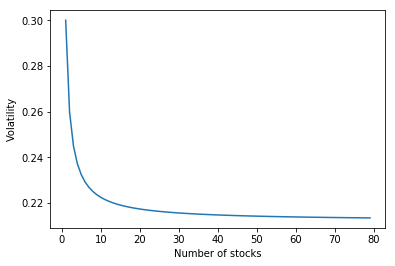

In [12]:
df1.loc['portfolio volatility(matrix)'].plot()
plt.xlabel('Number of stocks')
plt.ylabel('Volatility')
plt.show()